Group 5: Sam young, Raveel Tejani

# Lab Notebook 17: Nonlinear PCA and Stochastic Neighbor Embedding

In this short notebook, we will explore several extensions of PCA and try out T-SNE, another popular dimensionality reduction technique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.manifold import TSNE

## Step 1:

Load the breast cancer dataset from the sklearn datasets library. We already looked at that one in one homework assignment. It contains 569 examples with 30 features each. The target is a binary class label, malignant or not.

Perform linear PCA on the dataset. Remember that the mean of every column must be zero. Plot the explained variance ratio, is PCA meaningful? 

Make a scatter plot of the first two principal components, while colouring the data points with the class label. Can PCA separate the two classes? How much variance is explained by the first two components alone?

 - **PCA is fairly meaningful**
 - **we can see a fair linear seperation between the classes**
 - **The first two components only explain ~ 63% of the variance**

In [2]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

#confirming example and feature numbers
print(X.shape, y.shape)

#checking means of columns
#[np.round(X[:,i].mean()) for i in range(30)]

(569, 30) (569,)


In [3]:
# scale the dataset so the means of the columns are zero
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

#random checking means of columns
np.all(np.abs([np.round(X_s[:,i].mean(), 10) for i in range(30)])) == 0

True

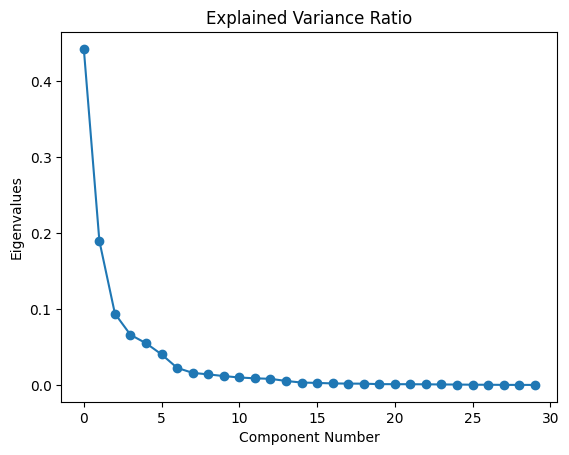

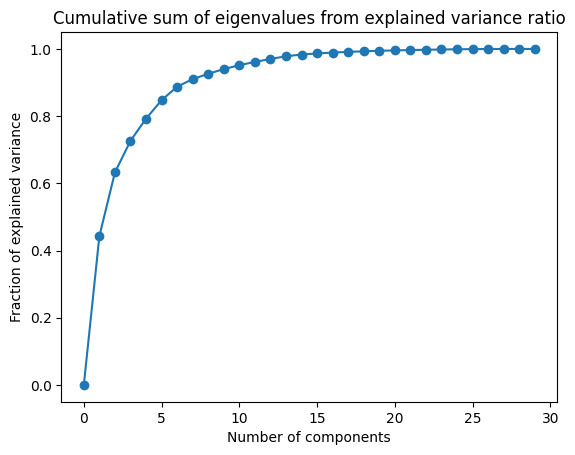

30
[0.   0.44 0.63 0.73 0.79 0.85 0.89 0.91 0.93 0.94 0.95 0.96 0.97 0.98
 0.98 0.99 0.99 0.99 0.99 0.99 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]


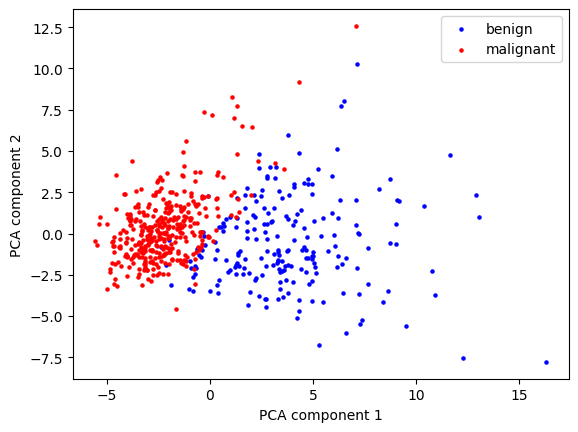

In [4]:
#linear PCA
pca = PCA()
X_pca = pca.fit_transform(X_s)

eigs = pca.explained_variance_ratio_

plt.plot(eigs, '-o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.title('Explained Variance Ratio')
plt.show()

cumulative_sum = []
for i in range(len(eigs)):
    cumulative_sum.append(np.sum(eigs[:i]))
    
plt.plot(cumulative_sum, '-o')
plt.xlabel('Number of components')
plt.ylabel('Fraction of explained variance')
plt.title('Cumulative sum of eigenvalues from explained variance ratio')
plt.show()

print(len(cumulative_sum))
print(np.round(cumulative_sum,2))

comp_1 = X_pca[:,0] 
comp_2 = X_pca[:,1]  

plt.scatter(comp_1[y==0], comp_2[y==0], s = 5, color = 'blue', label = 'benign')
plt.scatter(comp_1[y==1], comp_2[y==1], s = 5, color = 'red', label='malignant')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

## Step 2:

We are now going to add nonlinear polynomial features to the dataset. Let us consider a second order polynomial map $$ \textbf{x}→(1,x_1,…,x_d,x_1^2,…x^2_d,x_1x_2,x_1x_3,…),$$
which effectively adds a square of the number of features.

You can use the utility **PolynomialFeatures** from preprocessing for this purpose, familiar from week 1. 

Then perform PCA on this dataset (without any additional scaling of the added features) and plot the first two PCA components. Any improvement?

- **poly PCA performs better, we can see the first two components now explain 100% of the variance**

(569, 496)


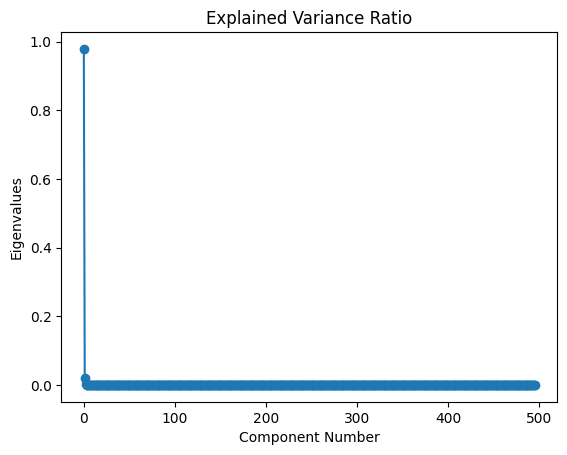

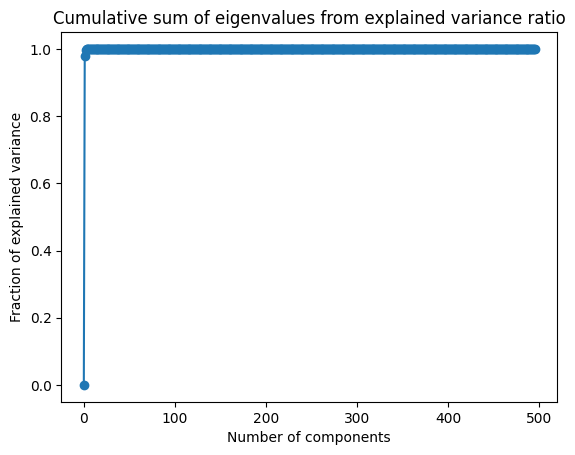

[0.   0.98 1.   1.   1.   1.   1.  ]


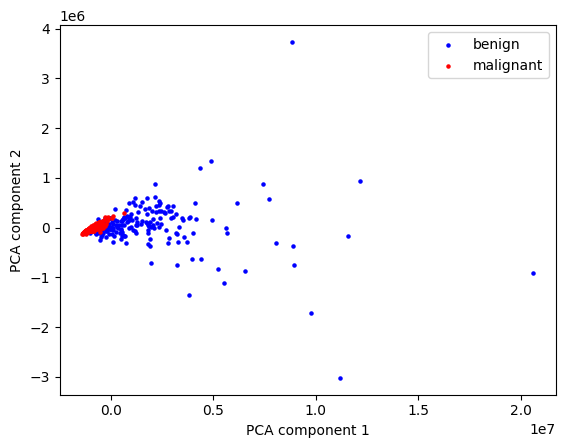

In [5]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

print(X_poly.shape)

#linear PCA
pca = PCA()
X_pca = pca.fit_transform(X_poly)

eigs = pca.explained_variance_ratio_

plt.plot(eigs, '-o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.title('Explained Variance Ratio')
plt.show()

cumulative_sum = []
for i in range(len(eigs)):
    cumulative_sum.append(np.sum(eigs[:i]))
    
plt.plot(cumulative_sum, '-o')
plt.xlabel('Number of components')
plt.ylabel('Fraction of explained variance')
plt.title('Cumulative sum of eigenvalues from explained variance ratio')
plt.show()

print(np.round(cumulative_sum,2)[0:7])

comp_1 = X_pca[:,0]
comp_2 = X_pca[:,1]

plt.scatter(comp_1[y==0], comp_2[y==0], s = 5, color = 'blue', label = 'benign')
plt.scatter(comp_1[y==1], comp_2[y==1], s = 5, color = 'red', label='malignant')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

## Step 3:

Creating the polynomical features should be equivalent to performing a kernelPCA with a 'poly' kernel of degree 2. Use sklearn's KernelPCA and plot again the first two PCA components. Do they agree with your previous plot?

- **the plots agree**

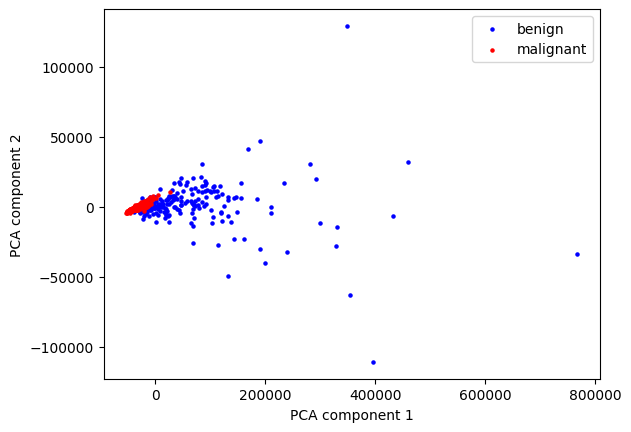

In [6]:
kernel_pca = KernelPCA(kernel='poly', degree=2)
X_kernel_pca = kernel_pca.fit_transform(X)

comp_1 = X_kernel_pca[:,0]
comp_2 = X_kernel_pca[:,1]

plt.scatter(comp_1[y==0], comp_2[y==0], s = 5, color = 'blue', label = 'benign')
plt.scatter(comp_1[y==1], comp_2[y==1], s = 5, color = 'red', label='malignant')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

## Step 4:

Let's replace the polynomial kernel with the rbf kernel, and make the same plot. You have to adjust the value of the gamma parameter to get good results.

gamma = 0.001


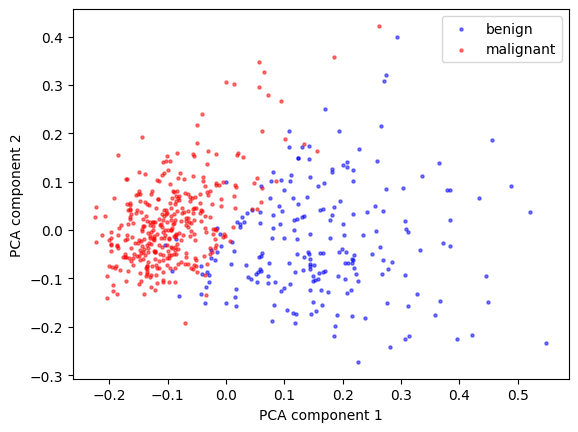

gamma = 0.013250000000000001


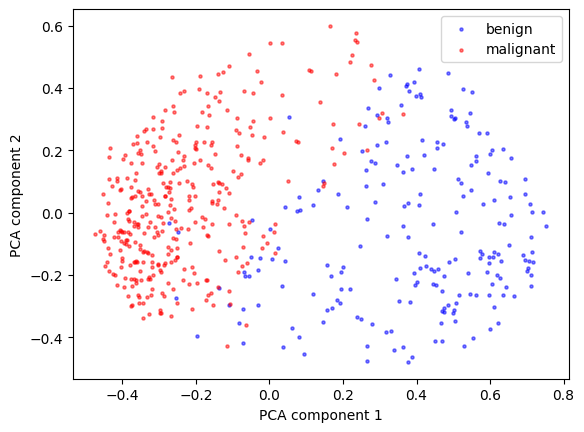

gamma = 0.025500000000000002


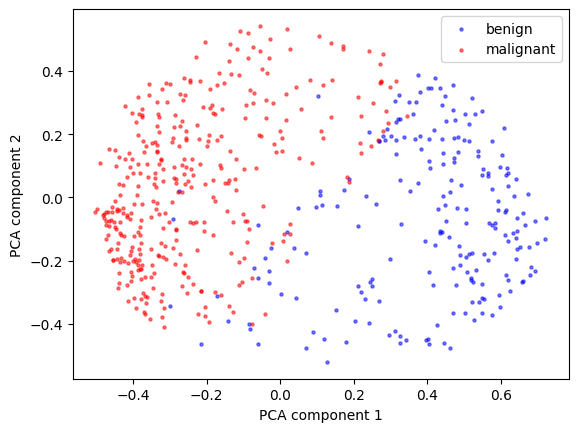

gamma = 0.037750000000000006


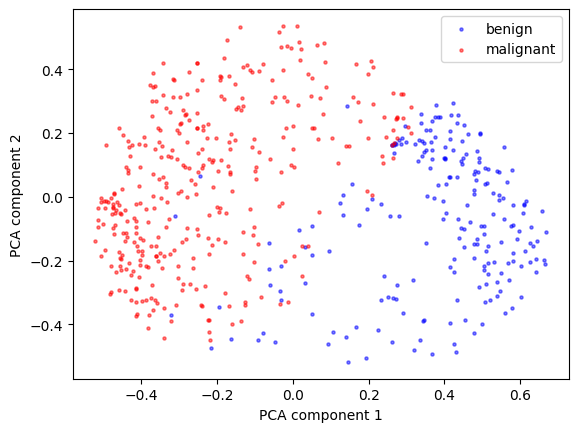

gamma = 0.05


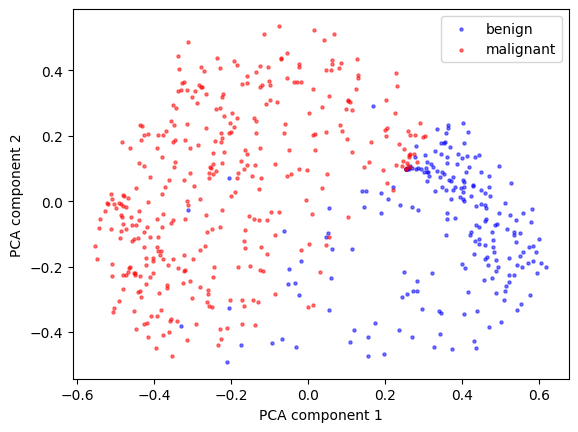

In [7]:
gammas = np.linspace(0.001,0.05,5)

for gamma in gammas:
    print('gamma = {}'.format(gamma))
    kernel_pca = KernelPCA(kernel='rbf', degree=2, gamma = gamma)
    X_kernel_pca = kernel_pca.fit_transform(X_s)

    # should we be using column 0 and 1 or 1 and 2 like in lab 16 part 3?
    comp_1 = X_kernel_pca[:,0]
    comp_2 = X_kernel_pca[:,1]

    plt.scatter(comp_1[y==0], comp_2[y==0], s = 5, color = 'blue', label = 'benign', alpha = 0.5)
    plt.scatter(comp_1[y==1], comp_2[y==1], s = 5, color = 'red', label='malignant', alpha = 0.5)
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.legend()
    plt.show()

## Step 5:

Lastly, let's check out T-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) from the manifold package. It is a very different approach but can sometimes be useful when PCA fails. Set **n_components=2, n_iter=500** (It takes a few seconds). How does the method do on our dataset, again looking at the first two components?

- **the method performs well, we can see clear seperation between the classes**

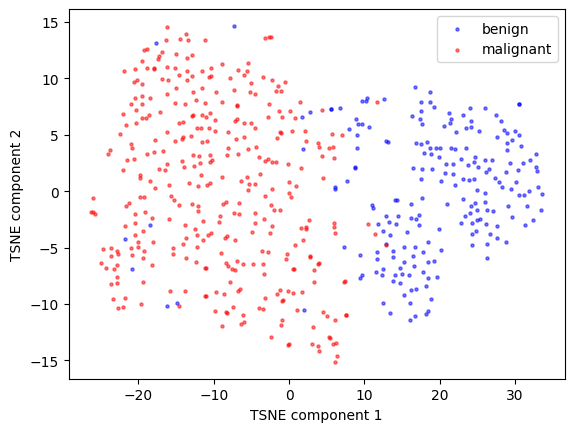

In [8]:
tsne = TSNE(n_components=2, n_iter=500)
X_tsne = tsne.fit_transform(X_s)

comp_1 = X_tsne[:,0]
comp_2 = X_tsne[:,1]

plt.scatter(comp_1[y==0], comp_2[y==0], s = 5, color = 'blue', label = 'benign', alpha = 0.5)
plt.scatter(comp_1[y==1], comp_2[y==1], s = 5, color = 'red', label='malignant', alpha = 0.5)
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.legend()
plt.show()